In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
#from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn import linear_model,tree,ensemble,neural_network
from sklearn.model_selection import GridSearchCV
#from sklearn.feature_selection import SelectKBest,f_regression
from keras.models import Sequential
from keras.layers import Dense, Dropout
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Credit card default I.csv")

In [3]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,1,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
#Cleaning

#ID Column not needed as it is just an index
df = df.drop(columns = "ID")

In [5]:
#Rename column for simplicity
df = df.rename(columns = {"default payment next month":"default"})

In [6]:
for col in df.columns:
    # Count number of occurrences of each value in the column
    value_counts = df[col].value_counts()
    # Print results
    print(f"{col}:")
    print(value_counts)
    print()

LIMIT_BAL:
50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: LIMIT_BAL, Length: 81, dtype: int64

SEX:
2    18111
1    11889
Name: SEX, dtype: int64

EDUCATION:
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

MARRIAGE:
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

AGE:
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67  

In [7]:
#In the data dictionary, -1 means that the loan is paid duly. Logically, in my opinion, 0 means that the loan is paid duly as well.
#Hence, all the 0 are changed to -1.
df.loc[:,['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] = df.loc[:,['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].replace(0,-1)

In [8]:
#In my opinion, -2 could mean that the loan is paid 2 months in advance, which means that the loans are paid duly. 
#Hence, all the -2 are changed to -1.
df.loc[:,['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] = df.loc[:,['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].replace(-2,-1)

In [9]:
#In the data dictionary, there are no values such as 0, 5, 6. Also, 4 is equivalent to others.
#Hence, I will classify 0, 5, 6 as others.
df.loc[:,['EDUCATION']] = df.loc[:,['EDUCATION']].replace(0,4)
df.loc[:,['EDUCATION']] = df.loc[:,['EDUCATION']].replace(5,4)
df.loc[:,['EDUCATION']] = df.loc[:,['EDUCATION']].replace(6,4)

In [10]:
#In the data dictionary, there are no values such as 0. Also, 3 is equivalent to others.
#Hence, I will classify 0 as others.
df.loc[:,['MARRIAGE']] = df.loc[:,['MARRIAGE']].replace(0,3)

In [11]:
check_list = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for col in check_list:
    #Check the summary of values from each column
    summary = df[col].describe()
    #Print results
    print(f"{col}:")
    print(summary)
    print()

LIMIT_BAL:
count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

AGE:
count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

BILL_AMT1:
count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64

BILL_AMT2:
count     30000.000000
mean      49179.075167
std       71173.768783
min      -69777.000000
25%        2984.750000
50%       21200.000000
75%       64006.250000
max      983931.000000
Name: BILL_AMT2, dtype: float64

BILL_AMT3:
count    3.000000e+04
mean     4.701315e+04
std      6.934939e+04
min     -1.572640e+05
2

In [12]:
#With this, cleaning is finished.
#The following columns: 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6' have negative values. However, this is possible
#as a negative balance could indicate that the bill was overpaid and that the customer may be eligible for a refund.

In [13]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,1,2,1,24,2,2,-1,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,-1,-1,-1,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,-1,-1,-1,-1,-1,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,-1,-1,-1,-1,-1,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,-1,-1,-1,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,-1,-1,-1,-1,-1,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,-1,-1,-1,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


<AxesSubplot:>

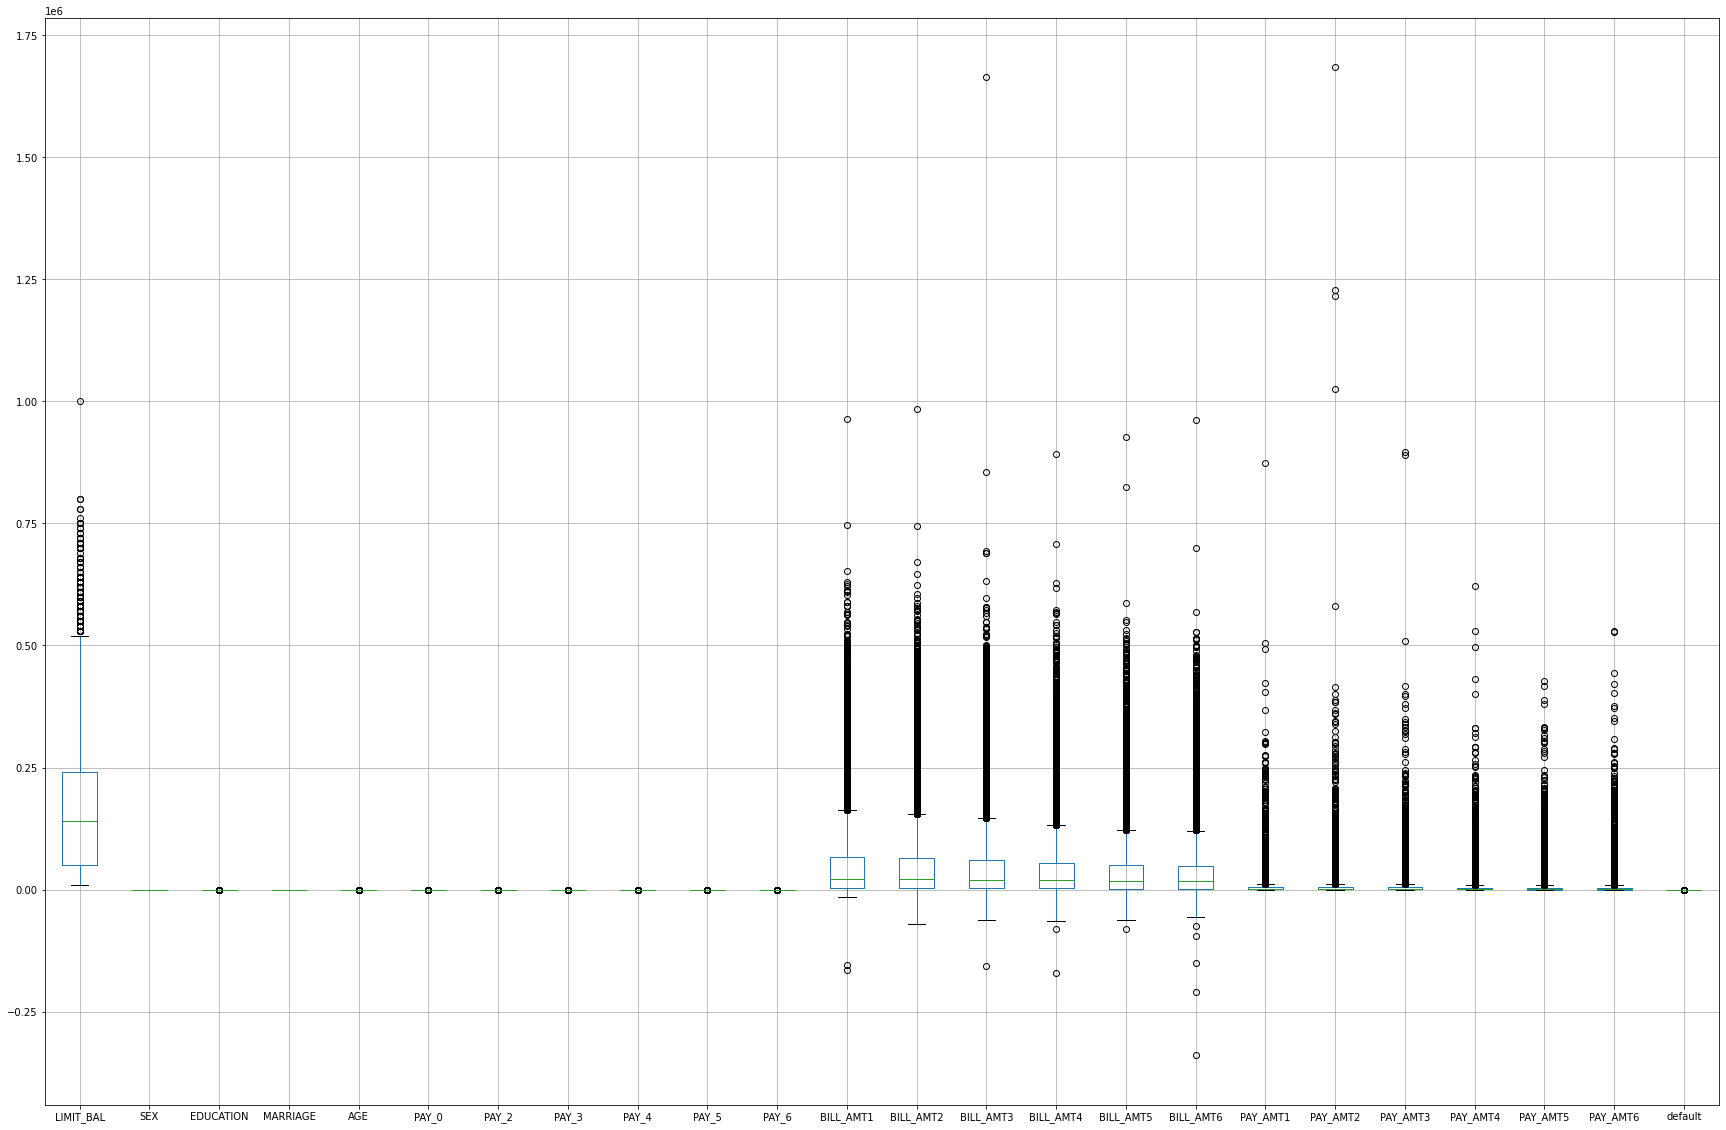

In [14]:
df.boxplot(figsize=(30,20)) #Pandas visualization

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'SEX'}>,
        <AxesSubplot:title={'center':'EDUCATION'}>,
        <AxesSubplot:title={'center':'MARRIAGE'}>,
        <AxesSubplot:title={'center':'AGE'}>],
       [<AxesSubplot:title={'center':'PAY_0'}>,
        <AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>,
        <AxesSubplot:title={'center':'PAY_4'}>,
        <AxesSubplot:title={'center':'PAY_5'}>],
       [<AxesSubplot:title={'center':'PAY_6'}>,
        <AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>,
        <AxesSubplot:title={'center':'BILL_AMT3'}>,
        <AxesSubplot:title={'center':'BILL_AMT4'}>],
       [<AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>,
        <AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}

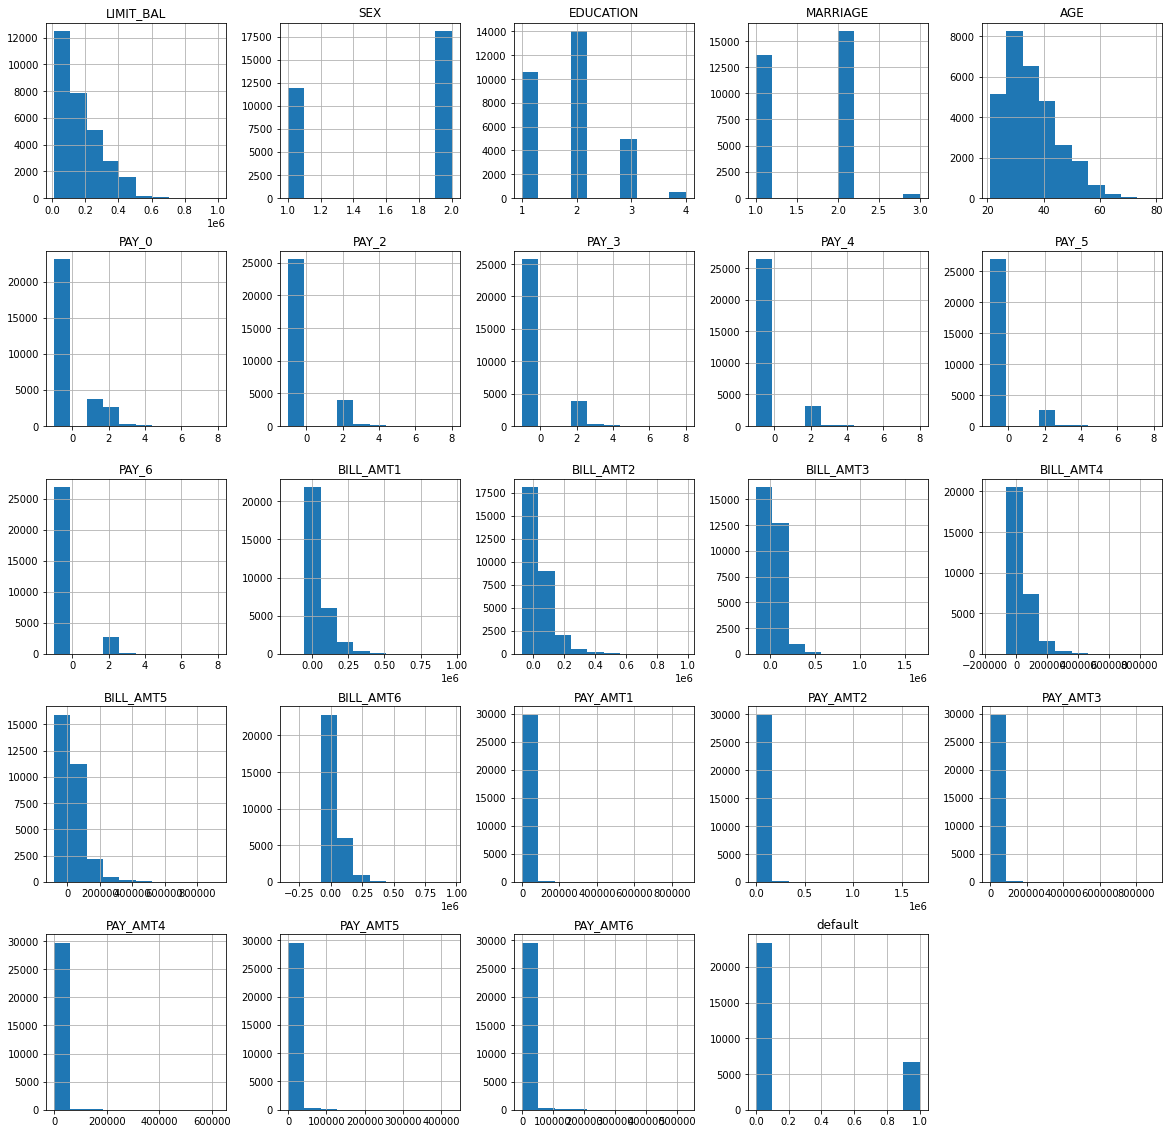

In [15]:
df.hist(figsize=(20,20)) #Pandas visualization

<AxesSubplot:>

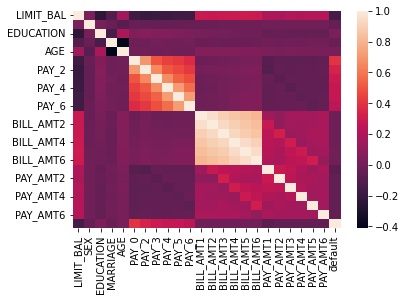

In [16]:
sns.heatmap(df.corr()) #Seaborn visualization

Text(0.5, 1.0, 'Credit Card Default Analysis')

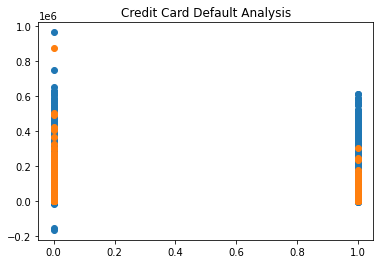

In [17]:
plt.scatter(df["default"],df["BILL_AMT1"])
plt.scatter(df["default"],df["PAY_AMT1"])
plt.title("Credit Card Default Analysis")

In [18]:
#Creating dummy variables
dummy1 = pd.get_dummies(df["SEX"],prefix="SEX")
dummy2 = pd.get_dummies(df["EDUCATION"],prefix="EDUCATION")
dummy3 = pd.get_dummies(df["MARRIAGE"],prefix="MARRIAGE")
dummy4 = pd.get_dummies(df["PAY_0"],prefix="PAY_0")
dummy5 = pd.get_dummies(df["PAY_2"],prefix="PAY_2")
dummy6 = pd.get_dummies(df["PAY_3"],prefix="PAY_3")
dummy7 = pd.get_dummies(df["PAY_4"],prefix="PAY_4")
dummy8 = pd.get_dummies(df["PAY_5"],prefix="PAY_5")
dummy9 = pd.get_dummies(df["PAY_6"],prefix="PAY_6")


df = df.merge(dummy1,left_index=True,right_index=True)
df = df.merge(dummy2,left_index=True,right_index=True)
df = df.merge(dummy3,left_index=True,right_index=True)
df = df.merge(dummy4,left_index=True,right_index=True)
df = df.merge(dummy5,left_index=True,right_index=True)
df = df.merge(dummy6,left_index=True,right_index=True)
df = df.merge(dummy7,left_index=True,right_index=True)
df = df.merge(dummy8,left_index=True,right_index=True)
df = df.merge(dummy9,left_index=True,right_index=True)


df = df.drop(columns="SEX", axis=1)
df = df.drop(columns="EDUCATION", axis=1)
df = df.drop(columns="MARRIAGE", axis=1)
df = df.drop(columns="PAY_0", axis=1)
df = df.drop(columns="PAY_2", axis=1)
df = df.drop(columns="PAY_3", axis=1)
df = df.drop(columns="PAY_4", axis=1)
df = df.drop(columns="PAY_5", axis=1)
df = df.drop(columns="PAY_6", axis=1)

In [19]:
X = df.drop(columns="default")
Y = df['default']

cols_to_norm = ["LIMIT_BAL", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
                "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]

#Normalizing
for col in cols_to_norm:
  X[col] = stats.zscore(X[col])

#Split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=22)

In [20]:
#Logistic Regression
model = linear_model.LogisticRegression(max_iter=1500)
model.fit(X_train,Y_train)
pred = model.predict(X_train)
cm = confusion_matrix(Y_train,pred)
cm

array([[16655,   832],
       [ 3231,  1782]])

In [21]:
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
cm

array([[5611,  266],
       [1054,  569]])

In [22]:
print("Logistic Regression accuracy is ", (cm[0,0]+cm[1,1])/sum(sum(cm)))

Logistic Regression accuracy is  0.824


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


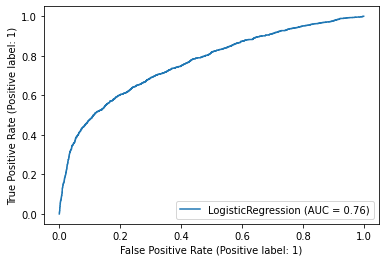

In [23]:
plot_roc_curve(model,X_test,Y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


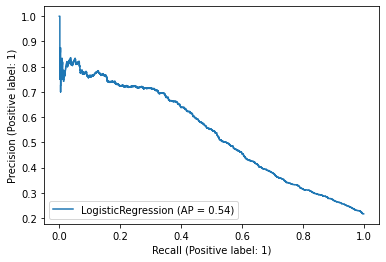

In [24]:
plot_precision_recall_curve(model,X_test,Y_test)

In [25]:
#Decision Tree
model = tree.DecisionTreeClassifier()
g = GridSearchCV(estimator=model, param_grid=dict(max_depth=[i for i in range(2,20)]) , cv=10)

In [26]:
g = g.fit(X_train,Y_train)

In [27]:
g.best_params_

{'max_depth': 2}

In [28]:
#Decision Tree cont.
model = tree.DecisionTreeClassifier(max_depth=2)
model.fit(X_train,Y_train)
pred = model.predict(X_train)
cm = confusion_matrix(Y_train,pred)
cm

array([[16762,   725],
       [ 3378,  1635]])

In [29]:
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
cm

array([[5649,  228],
       [1081,  542]])

In [30]:
print("Decision Tree accuracy is ", (cm[0,0]+cm[1,1])/sum(sum(cm)))

Decision Tree accuracy is  0.8254666666666667


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


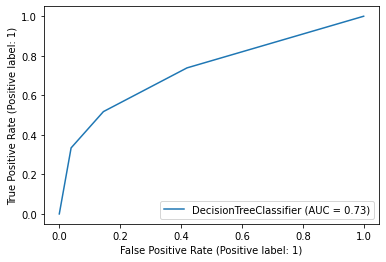

In [31]:
plot_roc_curve(model,X_test,Y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


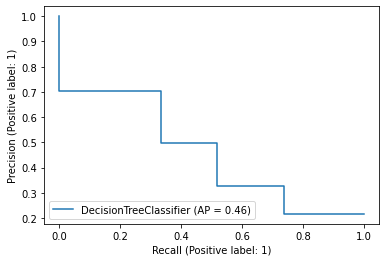

In [32]:
plot_precision_recall_curve(model,X_test,Y_test)

In [33]:
#Random Forest
model = ensemble.RandomForestClassifier()
model.fit(X_train,Y_train)
pred = model.predict(X_train)
cm = confusion_matrix(Y_train,pred)
cm

array([[17483,     4],
       [   13,  5000]])

In [34]:
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
cm

array([[5553,  324],
       [1025,  598]])

In [35]:
print("Random Forest accuracy is ", (cm[0,0]+cm[1,1])/sum(sum(cm)))

Random Forest accuracy is  0.8201333333333334


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


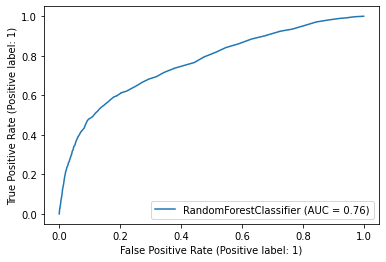

In [36]:
plot_roc_curve(model,X_test,Y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


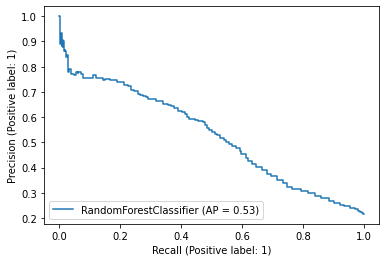

In [37]:
plot_precision_recall_curve(model,X_test,Y_test)

In [38]:
#XGBoost
model = ensemble.GradientBoostingClassifier()
model.fit(X_train,Y_train)
pred = model.predict(X_train)
cm = confusion_matrix(Y_train,pred)
cm

array([[16642,   845],
       [ 3096,  1917]])

In [39]:
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
cm

array([[5607,  270],
       [1029,  594]])

In [40]:
print("XGBoost accuracy is ", (cm[0,0]+cm[1,1])/sum(sum(cm)))

XGBoost accuracy is  0.8268


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


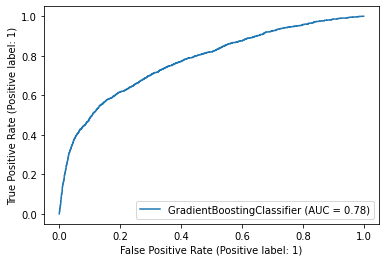

In [41]:
plot_roc_curve(model,X_test,Y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


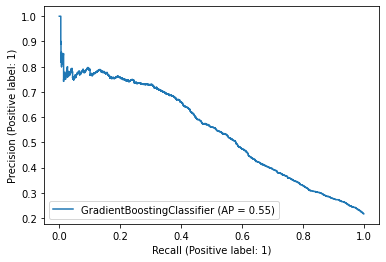

In [42]:
plot_precision_recall_curve(model,X_test,Y_test)

In [43]:
#Neural Network
model = neural_network.MLPClassifier()
model.fit(X_train,Y_train)
pred = model.predict(X_train)
cm = confusion_matrix(Y_train,pred)
cm

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([[16684,   803],
       [ 2848,  2165]])

In [45]:
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
cm

array([[5536,  341],
       [1037,  586]])

In [46]:
print("Neural Network accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

Neural Network accuracy is  0.8162666666666667


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


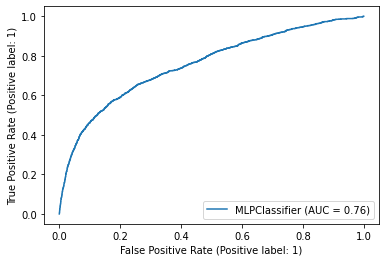

In [47]:
plot_roc_curve(model,X_test,Y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


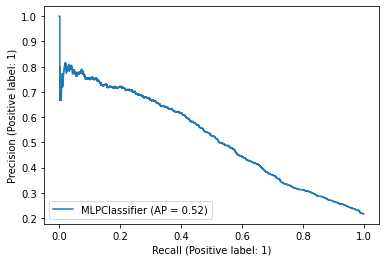

In [48]:
plot_precision_recall_curve(model,X_test,Y_test)

In [49]:
model = Sequential()

In [50]:
model.add(Dense(20,input_dim=len(X_train.columns),activation="relu"))
model.add(Dropout(0.1))

In [51]:
model.add(Dense(20,activation="relu"))
model.add(Dropout(0.1))

In [52]:
model.add(Dense(1,activation="sigmoid"))

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                1520      
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [55]:
h = model.fit(X_train,Y_train,batch_size=10,epochs=200)

Epoch 1/200
2250/2250 [==============================] - 6s 2ms/step - loss: 0.4773 - accuracy: 0.7978
Epoch 2/200
2250/2250 [==============================] - 6s 3ms/step - loss: 0.4474 - accuracy: 0.8144
Epoch 3/200
2250/2250 [==============================] - 6s 3ms/step - loss: 0.4440 - accuracy: 0.8178
Epoch 4/200
2250/2250 [==============================] - 5s 2ms/step - loss: 0.4412 - accuracy: 0.8189
Epoch 5/200
2250/2250 [==============================] - 7s 3ms/step - loss: 0.4394 - accuracy: 0.8179
Epoch 6/200
2250/2250 [==============================] - 5s 2ms/step - loss: 0.4382 - accuracy: 0.8184
Epoch 7/200
2250/2250 [==============================] - 6s 3ms/step - loss: 0.4372 - accuracy: 0.8195
Epoch 8/200
2250/2250 [==============================] - 6s 3ms/step - loss: 0.4373 - accuracy: 0.8193
Epoch 9/200
2250/2250 [==============================] - 6s 2ms/step - loss: 0.4362 - accuracy: 0.8185
Epoch 10/200
2250/2250 [==============================] - 7s 3ms/step - l

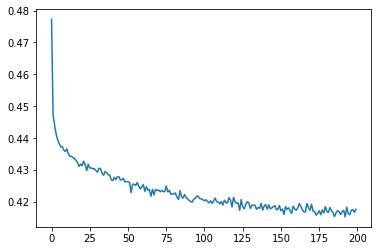

In [56]:
plt.plot(h.history["loss"])

In [57]:
pred = model.predict(X_test)

235/235 [==============================] - 0s 2ms/step


In [58]:
pred

array([[0.06483187],
       [0.15724306],
       [0.10307527],
       ...,
       [0.11039419],
       [0.23667262],
       [0.13549854]], dtype=float32)

In [59]:
pred = np.where(pred>=0.5,1,0)

In [60]:
cm = confusion_matrix(Y_test,pred)
cm

array([[5610,  267],
       [1079,  544]])

In [61]:
print("accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

accuracy is  0.8205333333333333


In [62]:
model.evaluate(X_test,Y_test)

235/235 [==============================] - 1s 2ms/step - loss: 0.4350 - accuracy: 0.8205


[0.43504512310028076, 0.8205333352088928]